In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')

# The Mean and Standard Deviation

In [5]:
population = np.array([1, 2, 2, 3, 12])

In [3]:
population_mean = population.mean()
print("Population mean: {}".format(population_mean))

Population mean: 4.0


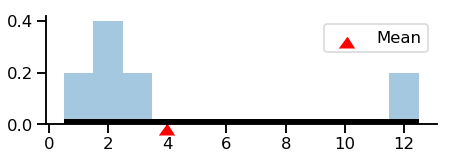

In [4]:
sns.distplot(population, kde=False, norm_hist=True, bins=np.arange(.5, 13, 1.));
plt.hlines(0., .5, 12.5, linewidth=10.)
plt.plot(
    [population_mean], [0], marker=6, linestyle='',
    markersize=15, color="red", clip_on=False,
    label='Mean'
);

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend();

plt.gcf().set_size_inches(7., 2)

plt.savefig('../img/2_mean.svg', bbox_inches='tight', pad_inches=.1)

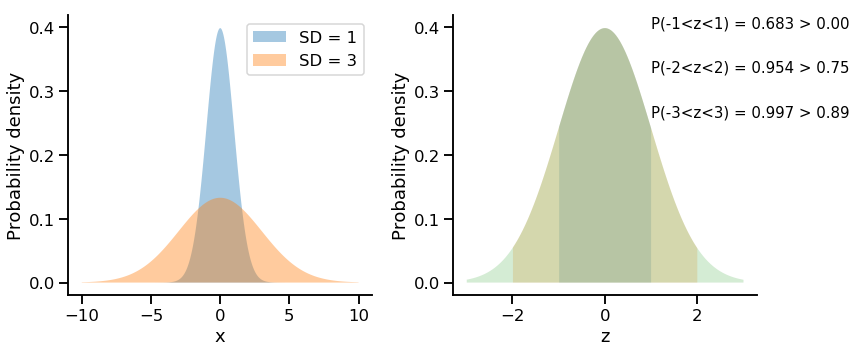

In [5]:
fig = plt.figure(figsize=(12., 5.))

x = np.arange(-10, 10, .01)

n1 = sns.distributions.stats.norm(loc=0, scale=1.)
n2 = sns.distributions.stats.norm(loc=0, scale=3.)

plt.subplot(1, 2, 1)

plt.fill_between(x, n1.pdf(x), alpha=.4, label="SD = 1")
plt.fill_between(x, n2.pdf(x), alpha=.4, label="SD = 3")
plt.xlabel('x')
plt.ylabel('Probability density')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend();

plt.subplot(1, 2, 2);

x= np.arange(-4., 4., .01)

label_string = 'P(-{0}<z<{0}) = {1:5.3f} > {2:4.2f}'
z = 1
plt.fill_between(x[np.abs(x) < z], n1.pdf(x[np.abs(x) < z]), alpha=.2, label='+/- 1 SD')
plt.annotate(
    label_string.format(z, n1.cdf(z) - n1.cdf(-z), 1 - z**(-2)),
    xy=(1, .4),
    xytext=(1, .4),
    fontsize=15
)

z = 2
plt.fill_between(x[np.abs(x) < z], n1.pdf(x[np.abs(x) < z]), alpha=.2, label='+/- 2 SD')
plt.annotate(
    label_string.format(z, n1.cdf(z) - n1.cdf(-z), 1 - z**(-2)),
    xy=(1, .33),
    xytext=(1, .33),
    fontsize=15
)

z = 3
plt.fill_between(x[np.abs(x) < z], n1.pdf(x[np.abs(x) < z]), alpha=.2, label='+/- 3 SD')
plt.annotate(
    label_string.format(z, n1.cdf(z) - n1.cdf(-z), 1 - z**(-2)),
    xy=(1, .26),
    xytext=(1, .26),
    fontsize=15
)

plt.xlabel('z')
plt.ylabel('Probability density')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout();
plt.savefig('../img/2_SD.svg', bbox_inches='tight', pad_inches=.1)

# Percentiles

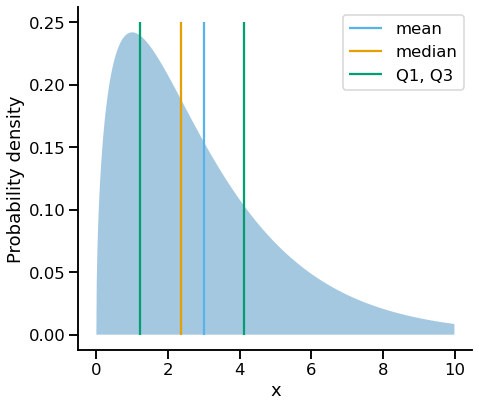

In [6]:
dist = sns.distributions.stats.chi2(3)
# df degrees of freadom (parameter in chi2)
# distribution that you get when you sum random variables squared from a normal distribution
# some squared numbers is what you do when do variance
# df: number of variables you are summing over


x = np.arange(0., 10., .01)
plt.fill_between(x, dist.pdf(x), alpha=.4)

plt.xlabel('x')
plt.ylabel('Probability density')

# mean
plt.vlines(dist.mean(), 0., .25,
           colors='#56B4E9', label='mean')

# median
plt.vlines(dist.median(), 0., .25,
           colors='#E69F00', label='median')

# quartiles
plt.vlines((dist.ppf(.25), dist.ppf(.75)), 0., .25,
           colors='#009E73', label="Q1, Q3");

plt.legend();

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.gcf().set_size_inches(7., 6.)
plt.tight_layout();
#plt.savefig('../img/2_Percentiles.svg', bbox_inches='tight', pad_inches=.1)

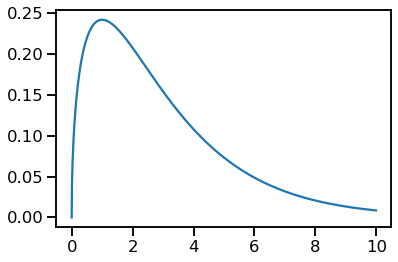

In [5]:
x=np.arange(0., 10., .01)
plt.plot(x, sns.distributions.stats.chi2(3).pdf(x))
#sns.distributions.stats.chi2(3).median() #statistical moment , SD variance
sns.distributions.stats.multivariate_normal()
#true value
#dif name for mean, SD, variance, kurtosis..
#moment(1) is mean
#sns.distributions.stats.chi2(3).ppf(.99)

11.450514382185887

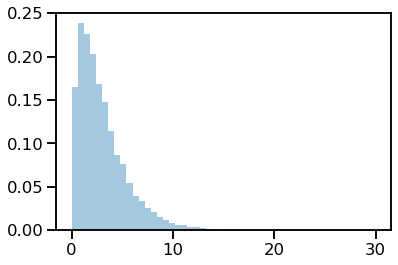

In [32]:
norm_dist=  sns.distributions.stats.norm.rvs(loc=0, scale=1)

rep= 10000

squares= (norm_dist.rvs((3, rep)) ** 2).sum(axis=0)

sns.distplot(squares, norm_hist=True, kde=False)

np.percentile(squares, 99) #sample percentile
